In [1]:
import keras
keras.__version__


'2.4.3'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [8]:

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 3.1428 - accuracy: 0.4195 - val_loss: 1.7699 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.5316 - accuracy: 0.6833 - val_loss: 1.3324 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 40ms/step - loss: 1.0932 - accuracy: 0.7698 - val_loss: 1.1660 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 40ms/step - loss: 0.8540 - accuracy: 0.8150 - val_loss: 1.0752 - val_accuracy: 0.7510
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.7002 - accuracy: 0.8506 - val_loss: 0.9936 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.5426 - accuracy: 0.8891 - val_loss: 0.9446 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.4253 - accuracy: 0.9113 - val_loss: 0.9142 - val_accuracy: 0.8100
Epoch 8/20
16

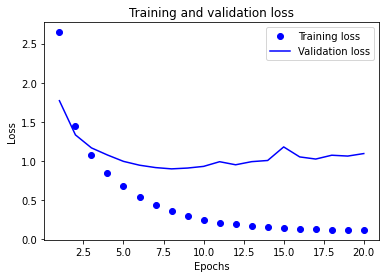

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

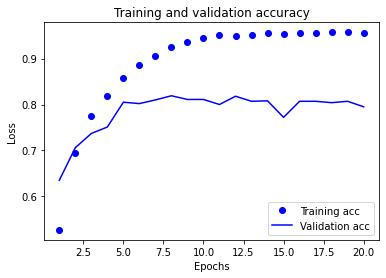

In [16]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=8,
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 51ms/step - loss: 3.0616 - accuracy: 0.4056 - val_loss: 1.6931 - val_accuracy: 0.6460
Epoch 2/8
16/16 [==============================] - 1s 41ms/step - loss: 1.4514 - accuracy: 0.6971 - val_loss: 1.2921 - val_accuracy: 0.7230
Epoch 3/8
16/16 [==============================] - 1s 40ms/step - loss: 1.0443 - accuracy: 0.7851 - val_loss: 1.1540 - val_accuracy: 0.7530
Epoch 4/8
16/16 [==============================] - 1s 40ms/step - loss: 0.8313 - accuracy: 0.8246 - val_loss: 1.0297 - val_accuracy: 0.7900
Epoch 5/8
16/16 [==============================] - 1s 40ms/step - loss: 0.6802 - accuracy: 0.8553 - val_loss: 0.9843 - val_accuracy: 0.8040
Epoch 6/8
16/16 [==============================] - 1s 40ms/step - loss: 0.5130 - accuracy: 0.8915 - val_loss: 0.9427 - val_accuracy: 0.8070
Epoch 7/8
16/16 [==============================] - 1s 40ms/step - loss: 0.4269 - accuracy: 0.9068 - val_loss: 0.9084 - val_accuracy: 0.8170
Epoch 8/8
71/71 [===

In [18]:
results

[1.0009081363677979, 0.7867319583892822]

In [20]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))

model1.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model1.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

results1 = model1.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 52ms/step - loss: 3.1282 - accuracy: 0.4245 - val_loss: 1.6784 - val_accuracy: 0.6580
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4295 - accuracy: 0.7091 - val_loss: 1.2821 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 1s 41ms/step - loss: 1.0794 - accuracy: 0.7702 - val_loss: 1.1318 - val_accuracy: 0.7640
Epoch 4/9
16/16 [==============================] - 1s 41ms/step - loss: 0.8444 - accuracy: 0.8184 - val_loss: 1.0296 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 1s 41ms/step - loss: 0.6617 - accuracy: 0.8639 - val_loss: 0.9754 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.5233 - accuracy: 0.8957 - val_loss: 0.9402 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 41ms/step - loss: 0.4092 - accuracy: 0.9137 - val_loss: 0.9400 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [21]:
results1

[0.9882379770278931, 0.7871772050857544]

In [22]:
import copy

In [23]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19323241317898487

In [24]:
predictions = model1.predict(x_test)

In [25]:
predictions[1].shape

(46,)

In [26]:
np.sum(predictions[1])

1.0

In [27]:
np.argmax(predictions[1])

10

In [28]:
np.argmax(predictions[0])

3

In [30]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=128,
           validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 3.2423 - accuracy: 0.3205 - val_loss: 2.2273 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 2.0211 - accuracy: 0.5203 - val_loss: 1.7341 - val_accuracy: 0.5850
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.6290 - accuracy: 0.5803 - val_loss: 1.6322 - val_accuracy: 0.5880
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.4827 - accuracy: 0.5872 - val_loss: 1.5874 - val_accuracy: 0.5830
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 1.4090 - accuracy: 0.5834 - val_loss: 1.5868 - val_accuracy: 0.5700
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 1.3603 - accuracy: 0.5872 - val_loss: 1.5920 - val_accuracy: 0.5890
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 1.3043 - accuracy: 0.6093 - val_loss: 1.5791 - val_accuracy: 0.5930
Epoch 8/20
63

In [31]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(4, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.fit(partial_x_train,
           partial_y_train,
           epochs=8,
           batch_size=128,
           validation_data=(x_val, y_val))

Epoch 1/8
63/63 [==============================] - 2s 17ms/step - loss: 3.4828 - accuracy: 0.1499 - val_loss: 2.6436 - val_accuracy: 0.2600
Epoch 2/8
63/63 [==============================] - 1s 15ms/step - loss: 2.3317 - accuracy: 0.3286 - val_loss: 1.7466 - val_accuracy: 0.6060
Epoch 3/8
63/63 [==============================] - 1s 15ms/step - loss: 1.5439 - accuracy: 0.6168 - val_loss: 1.5383 - val_accuracy: 0.6130
Epoch 4/8
63/63 [==============================] - 1s 15ms/step - loss: 1.3223 - accuracy: 0.6410 - val_loss: 1.4882 - val_accuracy: 0.6310
Epoch 5/8
63/63 [==============================] - 1s 15ms/step - loss: 1.2018 - accuracy: 0.6841 - val_loss: 1.4609 - val_accuracy: 0.6450
Epoch 6/8
63/63 [==============================] - 1s 15ms/step - loss: 1.1005 - accuracy: 0.7093 - val_loss: 1.4439 - val_accuracy: 0.6510
Epoch 7/8
63/63 [==============================] - 1s 15ms/step - loss: 1.0145 - accuracy: 0.7232 - val_loss: 1.4390 - val_accuracy: 0.6790
Epoch 8/8
63/63 [===

In [37]:
results3 = model3.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.5506 - accuracy: 0.6714


In [32]:
model4 = models.Sequential()
model4.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dense(46, activation='softmax'))

model4.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model4.fit(partial_x_train,
partial_y_train,
epochs=8,
batch_size=512,
validation_data=(x_val, y_val))

results4 = model4.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 2s 69ms/step - loss: 2.8042 - accuracy: 0.4390 - val_loss: 1.3935 - val_accuracy: 0.6810
Epoch 2/8
16/16 [==============================] - 1s 59ms/step - loss: 1.1620 - accuracy: 0.7518 - val_loss: 1.0863 - val_accuracy: 0.7780
Epoch 3/8
16/16 [==============================] - 1s 60ms/step - loss: 0.7806 - accuracy: 0.8374 - val_loss: 0.9595 - val_accuracy: 0.7960
Epoch 4/8
16/16 [==============================] - 1s 59ms/step - loss: 0.5641 - accuracy: 0.8793 - val_loss: 0.8876 - val_accuracy: 0.8130
Epoch 5/8
16/16 [==============================] - 1s 58ms/step - loss: 0.4072 - accuracy: 0.9177 - val_loss: 0.8897 - val_accuracy: 0.8020
Epoch 6/8
16/16 [==============================] - 1s 60ms/step - loss: 0.3126 - accuracy: 0.9343 - val_loss: 0.9020 - val_accuracy: 0.8060
Epoch 7/8
16/16 [==============================] - 1s 59ms/step - loss: 0.2548 - accuracy: 0.9439 - val_loss: 0.8869 - val_accuracy: 0.8090
Epoch 8/8
71/71 [===

In [34]:
model5 = models.Sequential()
model5.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(32, activation='relu'))
model5.add(layers.Dense(46, activation='softmax'))

model5.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model5.fit(partial_x_train,
partial_y_train,
epochs=8,
batch_size=512,
validation_data=(x_val, y_val))

results5 = model5.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 42ms/step - loss: 3.4496 - accuracy: 0.3334 - val_loss: 2.3733 - val_accuracy: 0.5830
Epoch 2/8
16/16 [==============================] - 0s 31ms/step - loss: 2.1282 - accuracy: 0.6275 - val_loss: 1.7028 - val_accuracy: 0.6540
Epoch 3/8
16/16 [==============================] - 1s 32ms/step - loss: 1.5355 - accuracy: 0.6982 - val_loss: 1.4023 - val_accuracy: 0.7020
Epoch 4/8
16/16 [==============================] - 1s 31ms/step - loss: 1.2200 - accuracy: 0.7494 - val_loss: 1.2405 - val_accuracy: 0.7470
Epoch 5/8
16/16 [==============================] - 1s 31ms/step - loss: 1.0228 - accuracy: 0.7888 - val_loss: 1.1412 - val_accuracy: 0.7640
Epoch 6/8
16/16 [==============================] - 0s 31ms/step - loss: 0.8772 - accuracy: 0.8222 - val_loss: 1.0736 - val_accuracy: 0.7740
Epoch 7/8
16/16 [==============================] - 1s 32ms/step - loss: 0.7443 - accuracy: 0.8413 - val_loss: 1.0248 - val_accuracy: 0.7820
Epoch 8/8
71/71 [===

In [35]:
model6 = models.Sequential()
model6.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model6.add(layers.Dense(46, activation='softmax'))

model6.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model6.fit(partial_x_train,
partial_y_train,
epochs=8,
batch_size=512,
validation_data=(x_val, y_val))

results6 = model6.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 49ms/step - loss: 2.9967 - accuracy: 0.4585 - val_loss: 1.7916 - val_accuracy: 0.6570
Epoch 2/8
16/16 [==============================] - 1s 41ms/step - loss: 1.5543 - accuracy: 0.7099 - val_loss: 1.3503 - val_accuracy: 0.7040
Epoch 3/8
16/16 [==============================] - 1s 38ms/step - loss: 1.0810 - accuracy: 0.7860 - val_loss: 1.1348 - val_accuracy: 0.7640
Epoch 4/8
16/16 [==============================] - 1s 40ms/step - loss: 0.8562 - accuracy: 0.8301 - val_loss: 1.0131 - val_accuracy: 0.7860
Epoch 5/8
16/16 [==============================] - 1s 40ms/step - loss: 0.6854 - accuracy: 0.8622 - val_loss: 0.9345 - val_accuracy: 0.7970
Epoch 6/8
16/16 [==============================] - 1s 40ms/step - loss: 0.5442 - accuracy: 0.8949 - val_loss: 0.8841 - val_accuracy: 0.8160
Epoch 7/8
16/16 [==============================] - 1s 40ms/step - loss: 0.4595 - accuracy: 0.9112 - val_loss: 0.8620 - val_accuracy: 0.8110
Epoch 8/8
71/71 [===

In [36]:
model7 = models.Sequential()
model7.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.Dense(46, activation='softmax'))

model7.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model7.fit(partial_x_train,
partial_y_train,
epochs=8,
batch_size=512,
validation_data=(x_val, y_val))

results7 = model7.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 50ms/step - loss: 3.1679 - accuracy: 0.3112 - val_loss: 1.7665 - val_accuracy: 0.6460
Epoch 2/8
16/16 [==============================] - 1s 40ms/step - loss: 1.5596 - accuracy: 0.6807 - val_loss: 1.3558 - val_accuracy: 0.6940
Epoch 3/8
16/16 [==============================] - 1s 41ms/step - loss: 1.1597 - accuracy: 0.7383 - val_loss: 1.1985 - val_accuracy: 0.7330
Epoch 4/8
16/16 [==============================] - 1s 41ms/step - loss: 0.9324 - accuracy: 0.7897 - val_loss: 1.0989 - val_accuracy: 0.7650
Epoch 5/8
16/16 [==============================] - 1s 41ms/step - loss: 0.7308 - accuracy: 0.8376 - val_loss: 1.0456 - val_accuracy: 0.7680
Epoch 6/8
16/16 [==============================] - 1s 40ms/step - loss: 0.5765 - accuracy: 0.8736 - val_loss: 0.9710 - val_accuracy: 0.7930
Epoch 7/8
16/16 [==============================] - 1s 41ms/step - loss: 0.4737 - accuracy: 0.8990 - val_loss: 0.9429 - val_accuracy: 0.8050
Epoch 8/8
71/71 [===